# Hands on: Clustering Analysis
## with PCA

In [10]:
# to execute and return the results of executions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Customer segmentation problem <a name="chi_problem"></a>
### Customer segmentation is the subdivision of a market into discrete customer groups that share similar characteristics

# The Data <a name="ch_data"></a>
### The customer dataset contains customer details of 2000 individuals as well as their purchase activities 

**It has seven demographic and geographic variables for each customer**

The attributes are:
- `Sex`
- `Marital status`
- `Age`
- `Education`
- `Income`
- `Occupation`
- `Settlement size`

| Variable | Data Type | Range | Description |
| --- | --- | --- | --- |
| ID | numerical | Integer | Shows a unique identificator of a customer. |
| Sex | categorical | {0,1} | Biological sex (gender) of a customer. 0 = male / 1 = female |
| Marital status | categorical | {0,1} | Marital status of a customer. 0 = single / 1 = non-single |
| Age | numerical | Integer | The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset (Min. age = 18 / Max. age = 78) |
| Education | categorical | {0,1,2,3} | Level of education of the customer. 0=no education / 1=high-school / 2=university / 3=graduate |
| Income | numerical | Real | Self-reported annual income in US dollars of the customer. |
| Occupation | categorical | {0,1,2} | Category of occupation of the customer. 0=unemployed / 1=employee/oficial / 2=management or self-employed |
| Settlement size | categorical | {0,1,2} | The size of the city that the customer lives in. 0=small / 1=mid-size / 2=big |


## Import the file customers.csv to a dataframe (csv file is available in eLearning). <a name="chapi_1"></a>

### Import  Libraries

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

sns.set()

### Import  Dataset

In [12]:
import numpy as np
import pandas as pd
df_customers = pd.read_csv("customers.csv")
df_customers.sample(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
460,100000461,0,0,37,1,124268,1,2
1877,100001878,0,1,29,1,89914,0,0
836,100000837,1,1,21,1,92351,1,0
691,100000692,1,1,25,1,104794,0,0
48,100000049,0,0,39,1,130500,0,0


## Obtain info and summary of the data  <a name="chapi_2"></a>

In [13]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


**Define categorical and numeric attributes**

In [14]:
num_columns = ['ID','Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']

df_customers_cat = df_customers[cat_columns].astype('str')
df_customers_cat.describe().T
df_customers_num = df_customers[num_columns]
df_customers_num.describe().T


,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0


# 1. (some) Exploratory data analysis

In [15]:
for numerical in num_columns:
    if numerical == 'ID': continue 
    plt.figure(figsize=(8,4))
    #make histplot
    #sns.histplot(data=df_customers, x= numerical, hue="y")

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

- `Age` and `Income` have a right skew
(...)

<Figure size 800x400 with 0 Axes>

<AxesSubplot: xlabel='Sex', ylabel='count'>

<Figure size 800x400 with 0 Axes>

<AxesSubplot: xlabel='Marital status', ylabel='count'>

<Figure size 800x400 with 0 Axes>

<AxesSubplot: xlabel='Education', ylabel='count'>

<Figure size 800x400 with 0 Axes>

<AxesSubplot: xlabel='Occupation', ylabel='count'>

<Figure size 800x400 with 0 Axes>

<AxesSubplot: xlabel='Settlement size', ylabel='count'>

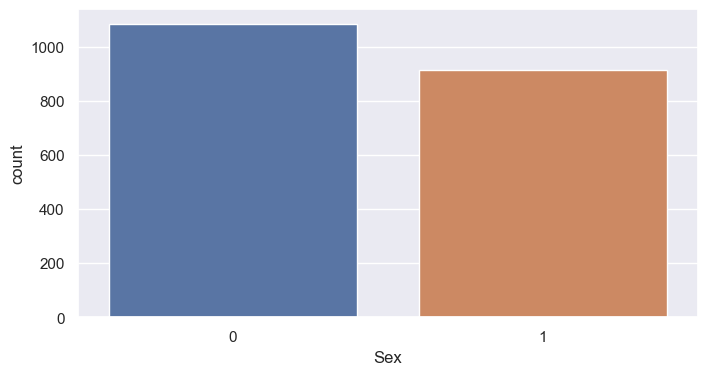

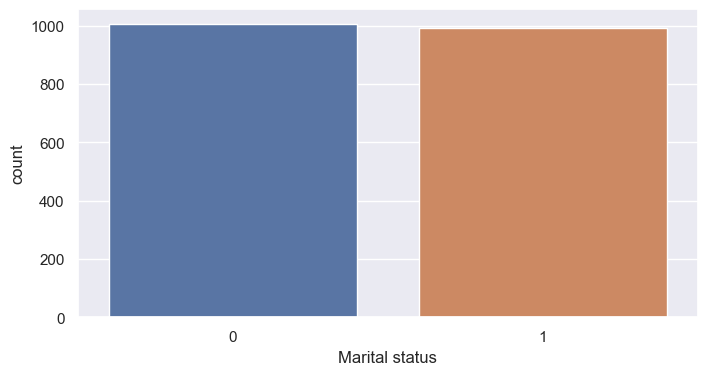

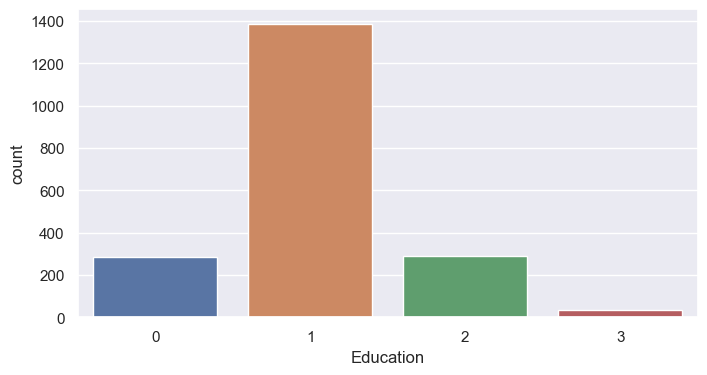

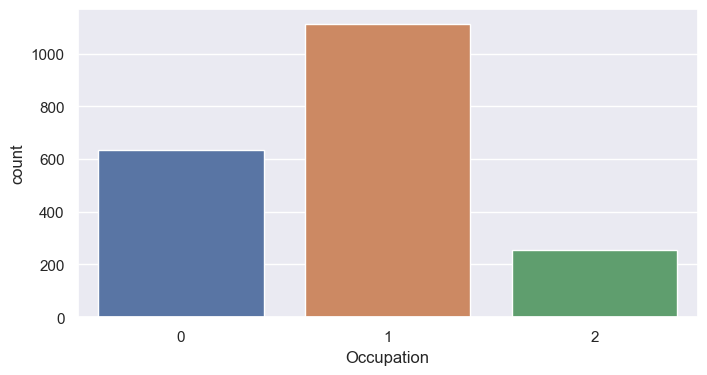

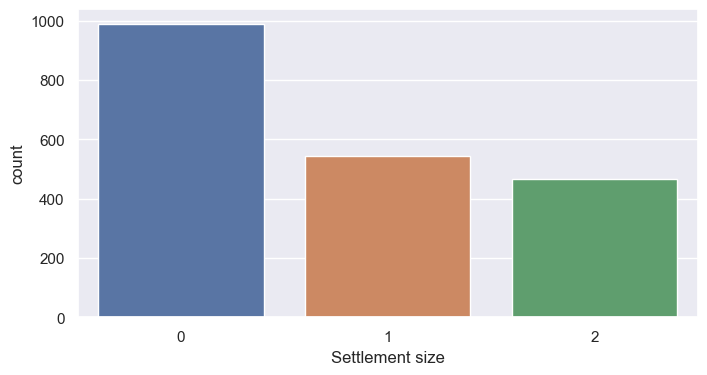

In [16]:
for category in cat_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_customers, x=category)
    

## 1.1. Categorical Variables 
- `Sex` and `Marital status` are balanced 
- `Education`: most customers have highschool level education (considering join both categories ('2' and '3') in a category called university & over)
- Both the `Occupation` and `Settlement size` attributes seem to have a larger enough quantity of instances of each category

##  1.2. performe Multivariate Analysis

## ...

## 1.3. Try to understand the relation between pairs of attributes (observe the correlation using a heat map)

<Figure size 1200x900 with 0 Axes>

[Text(0.5, 0, 'ID'),
 Text(1.5, 0, 'Sex'),
 Text(2.5, 0, 'Marital status'),
 Text(3.5, 0, 'Age'),
 Text(4.5, 0, 'Education'),
 Text(5.5, 0, 'Income'),
 Text(6.5, 0, 'Occupation'),
 Text(7.5, 0, 'Settlement size')]

Text(0.5, 1.0, 'Correlation Matrix')

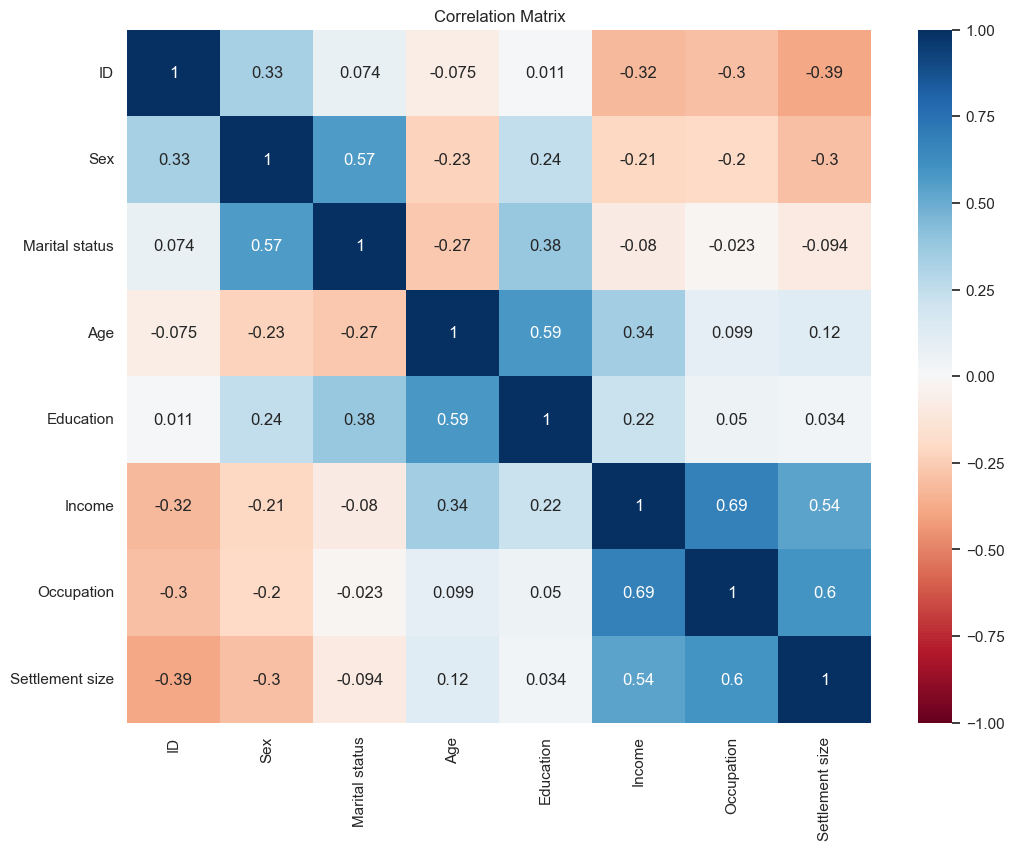

In [17]:
plt.figure(figsize=(12, 9))
s = sns.heatmap(df_customers.corr('spearman'),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

# 2. Data Preprocessing

### Missing values

**There are no missing values (see .info())**

##2.1. Standardize the dataframe

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers_scaled= scaler.fit_transform(df_customers)
#see .info()
customers_scaled.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

# 3. Clustering the data

## 3.1. Using the elbow method to find the optimal number of clusters 
 ----K-means++ is considered the best way to initialize the centroids
 
 --- experimental strategy to choose K ( the number of clusters)

## 3.2. K-means clustering

KMeans(n_clusters=1, random_state=0)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=5, random_state=0)

KMeans(n_clusters=6, random_state=0)

KMeans(n_clusters=7, random_state=0)

KMeans(random_state=0)

KMeans(n_clusters=9, random_state=0)

KMeans(n_clusters=10, random_state=0)

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Distortion')

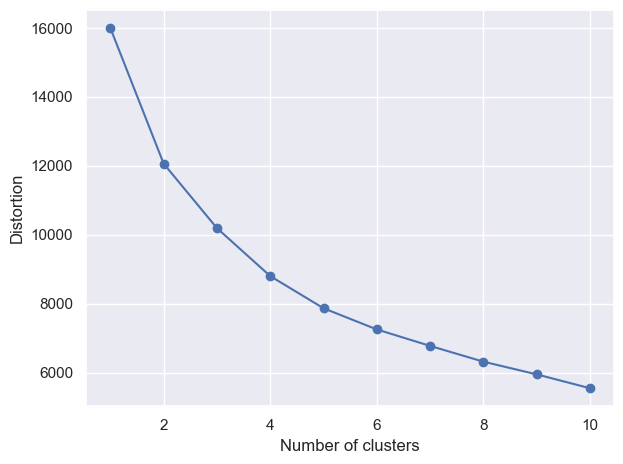

In [19]:

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(customers_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## Question:

**What is the meaning of the parameter inertia?**

## Question:

**What is the "optimal" numnber of clusters?**

## 3.3. Quantifying the quality of clustering via silhouette plots

### K-means clustering with 4 clusters

<BarContainer object of 270 artists>

<BarContainer object of 674 artists>

<BarContainer object of 637 artists>

<BarContainer object of 419 artists>

([<matplotlib.axis.YTick at 0x1fe1914d390>,
 [Text(0, 135.0, '1'),
  Text(0, 607.0, '2'),
  Text(0, 1262.5, '3'),
  Text(0, 1790.5, '4')])

Text(0, 0.5, 'Cluster')

Text(0.5, 0, 'Silhouette coefficient')

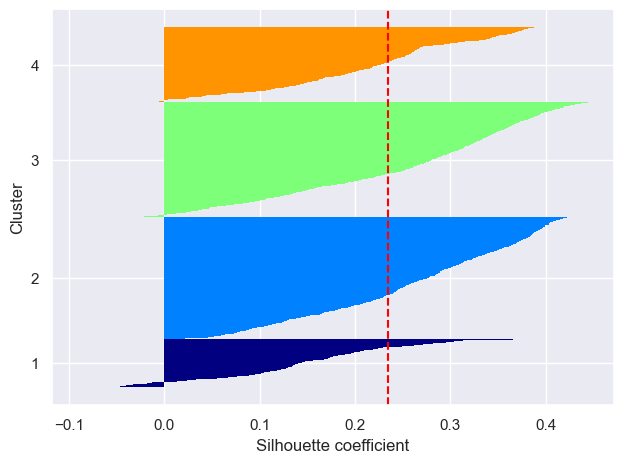

Silhouette coef =  0.23444671406267498


In [20]:
NumClusters = 4;

from sklearn.metrics import silhouette_samples
from matplotlib import cm

km = KMeans(n_clusters=NumClusters, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(customers_scaled)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(customers_scaled, y_km, metric='euclidean')


y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

print('Silhouette coef = ', silhouette_avg)

## 3.4. Summary statistics of each cluster
###  try to understand the characteristics of the people in each cluster

In [21]:
df_customers_kmeans = df_customers.copy()
df_customers_kmeans['Segment'] = km.labels_  # It will contain the predicted clusters for each observation in our data set
df_customers_kmeans.sample(5)

df_customers_kmeans.groupby('Segment')['ID'].nunique()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
901,100000902,0,1,44,2,131619,1,0,0
1278,100001279,0,0,35,1,150237,2,2,2
152,100000153,0,0,24,0,153286,1,1,2
143,100000144,0,0,22,0,101185,1,1,2
1704,100001705,0,0,29,0,89170,0,0,3


Segment
0    270
1    674
2    637
3    419
Name: ID, dtype: int64

In [22]:
num_columns = ['ID','Age','Income', 'Segment']
cat_columns = ['ID', 'Sex','Marital status','Education','Occupation','Settlement size', 'Segment']

### Cluster 0

(270, 9)

StopIteration: 

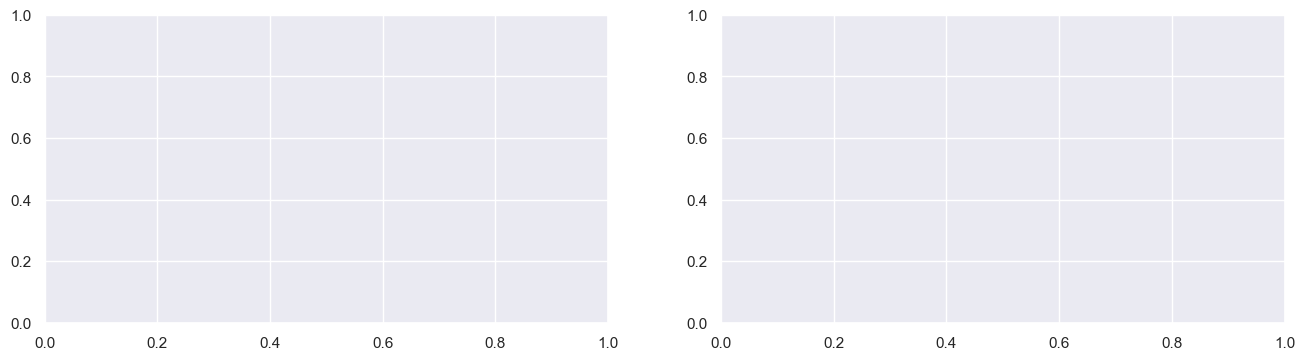

In [23]:
df_cluster0 = df_customers_kmeans[df_customers_kmeans['Segment'] == 0]
df_cluster0.shape

fig, axes = plt.subplots(1, 2, figsize=(16,4))
ind=-1
for numerical in num_columns:
    if numerical == 'ID' or numerical == 'Segment': continue 
    ind=ind+1
    sns.histplot(data=df_cluster0, x=numerical, ax=axes[ind])
    
plt.show()

for category in cat_columns:
    if category == 'ID' or category == 'Segment': continue 
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_cluster0, x=category)


### Conclusion Cluster 0:

**Characteristics of this cluster:**
- Mostly non-single men
- education is high-school level or above
- generally, employee/oficial
- live in big cities
- age, mostly, between 20 and 40 
- low-medium income



### Cluster 1

(674, 9)

StopIteration: 

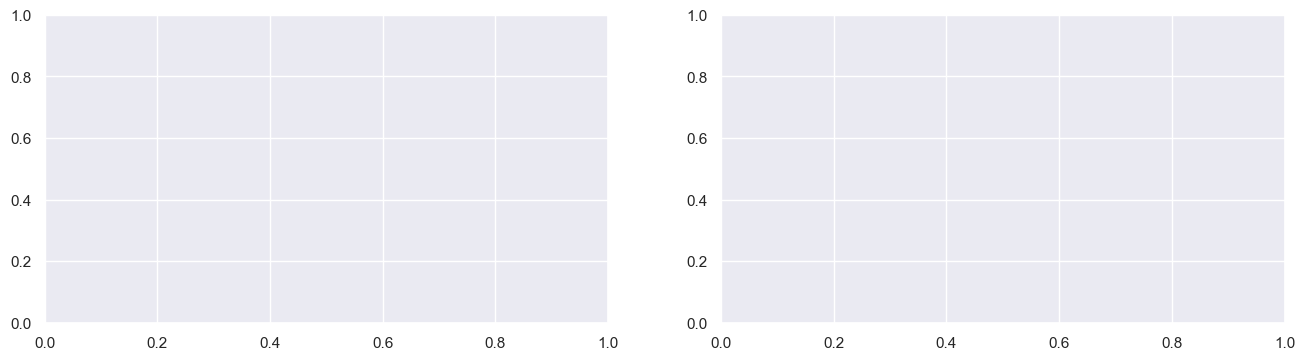

In [24]:
df_cluster1 = df_customers_kmeans[df_customers_kmeans['Segment'] == 1]
df_cluster1.shape

fig, axes = plt.subplots(1, 2, figsize=(16,4))
ind=-1
for numerical in num_columns:
    if numerical == 'ID' or numerical == 'Segment': continue 
    ind=ind+1
    sns.histplot(data=df_cluster1, x=numerical, ax=axes[ind])
    
plt.show()

for category in cat_columns:
    if category == 'ID' or category == 'Segment': continue 
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_cluster1, x=category)


### Conclusion Cluster 1:

**Characteristics of this cluster:**
## (...)


### Cluster 2

(637, 9)

StopIteration: 

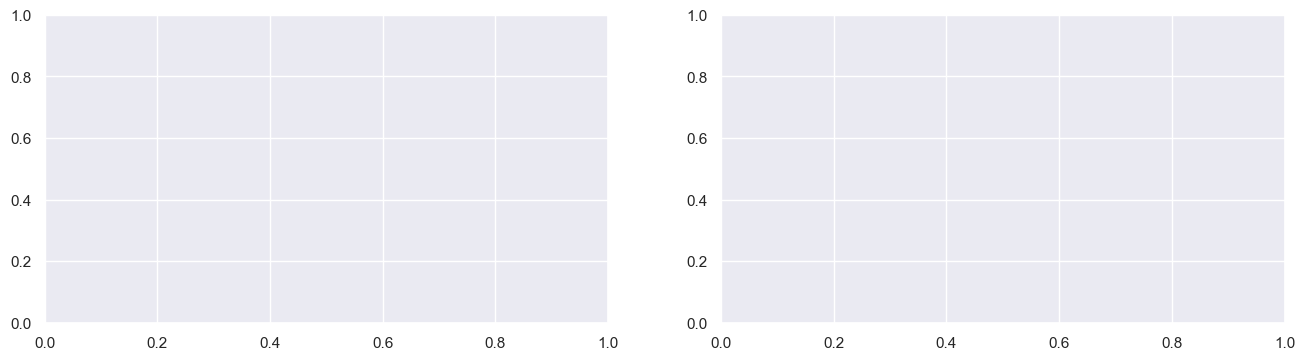

In [25]:
df_cluster2 = df_customers_kmeans[df_customers_kmeans['Segment'] == 2]
df_cluster2.shape

fig, axes = plt.subplots(1, 2, figsize=(16,4))
ind=-1
for numerical in num_columns:
    if numerical == 'ID' or numerical == 'Segment': continue 
    ind=ind+1
    sns.histplot(data=df_cluster2, x=numerical, ax=axes[ind])
    
plt.show()

for category in cat_columns:
    if category == 'ID' or category == 'Segment': continue 
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_cluster2, x=category)

### Conclusion Cluster 2:

**Characteristics of this cluster:**
## (...)

### Cluster 3

(419, 9)

<AxesSubplot:xlabel='Age', ylabel='Count'>

<AxesSubplot:xlabel='Income', ylabel='Count'>

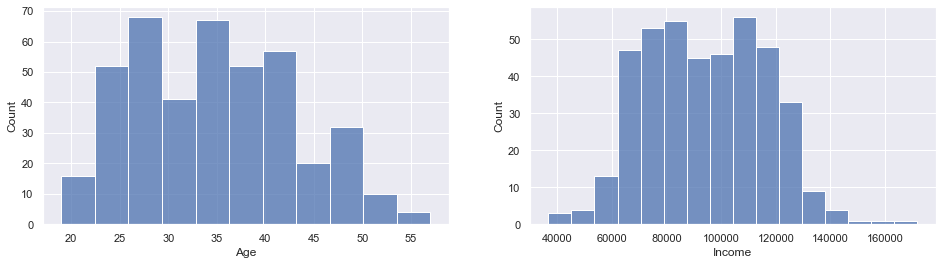

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Sex', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Marital status', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Education', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Occupation', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Settlement size', ylabel='count'>

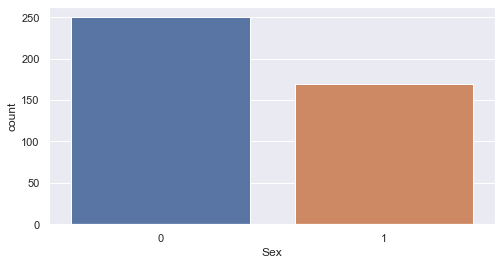

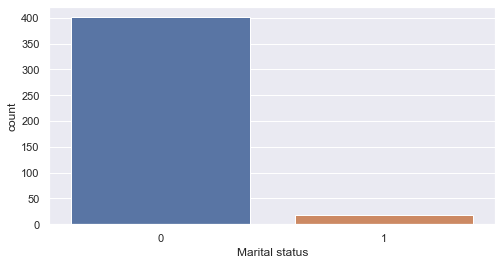

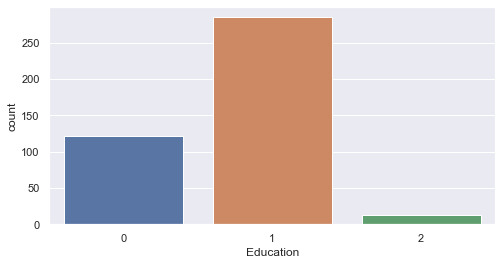

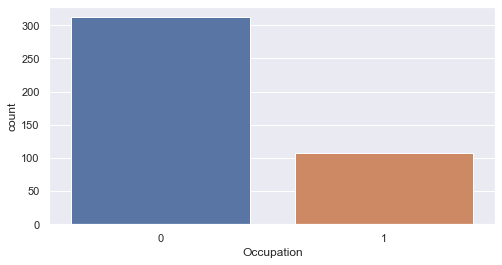

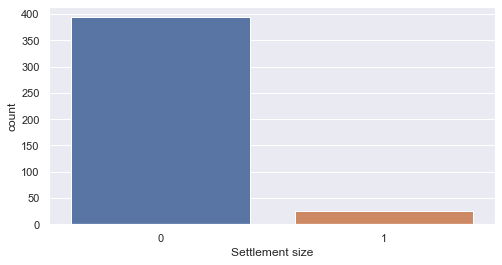

In [ ]:
df_cluster3 = df_customers_kmeans[df_customers_kmeans['Segment'] == 3]
df_cluster3.shape

fig, axes = plt.subplots(1, 2, figsize=(16,4))
ind=-1
for numerical in num_columns:
    if numerical == 'ID' or numerical == 'Segment': continue 
    ind=ind+1
    sns.histplot(data=df_cluster3, x=numerical, ax=axes[ind])
    
plt.show()

for category in cat_columns:
    if category == 'ID' or category == 'Segment': continue 
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_cluster3, x=category)

### Conclusion Cluster 3:

**Characteristics of this cluster:**
## (...)

## 3.5. Visualize the segmented customers

### Age vs Income

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='Age', ylabel='Income'>

Text(0.5, 1.0, 'Age vs Income in each segment')

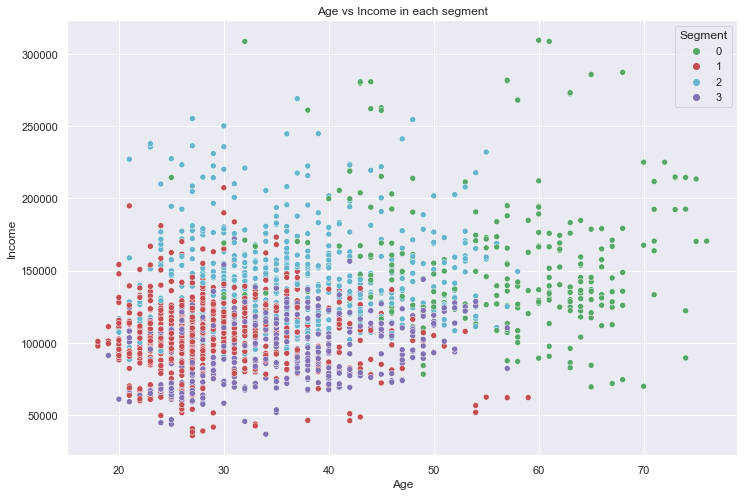

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df_customers_kmeans['Age'],
    y=df_customers_kmeans['Income'],
    hue=df_customers_kmeans['Segment'],
    palette=['g','r','c','m']
)

plt.title('Age vs Income in each segment')
plt.show()

### Education vs Income

<Figure size 1152x576 with 0 Axes>

<AxesSubplot:xlabel='Education', ylabel='Income'>

Text(0.5, 1.0, 'Education vs Income in each segment')

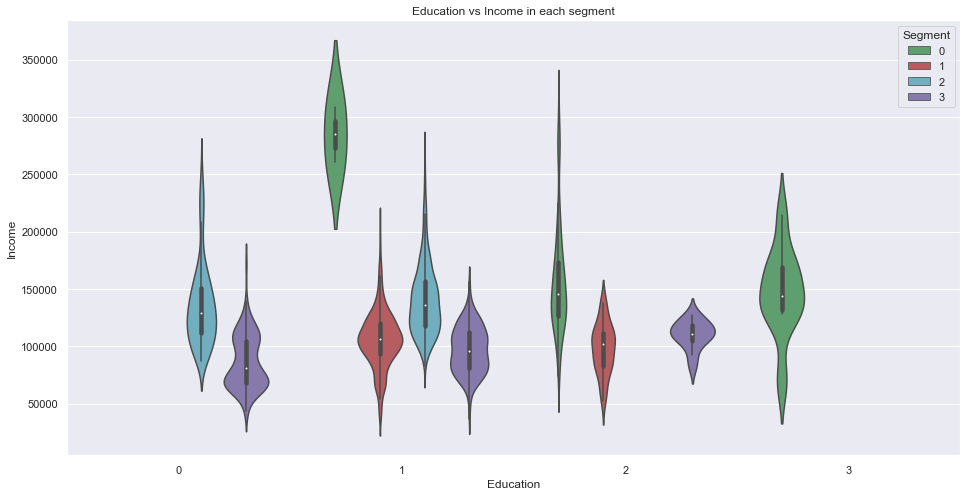

In [ ]:
plt.figure(figsize=(16, 8))
sns.violinplot(
    x=df_customers_kmeans['Education'],
    y=df_customers_kmeans['Income'],
    hue=df_customers_kmeans['Segment'],
    palette=['g','r','c','m']
)
plt.title('Education vs Income in each segment')
plt.show()

---

# 4. Improve k-means with PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(customers_scaled)

pca.explained_variance_ratio_

PCA()

array([0.34103573, 0.23178599, 0.16650585, 0.09955452, 0.06169548,
       0.04785186, 0.03407515, 0.01749541])

##4.1 Plot the cumulative sum of the variability against the number of components

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cumulative Explained Variance')

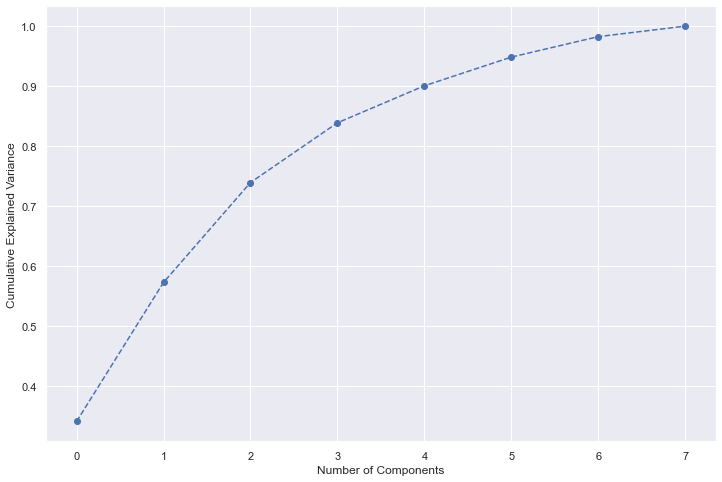

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

## Question:

## How many components to explain above 90% of the data variance?

**Use 4 components and fit the PCA model**

In [ ]:
pca = PCA(n_components=4)
pca.fit(customers_scaled)

df_pca_components = pd.DataFrame(
    data=pca.components_,
    columns=df_customers.columns.values,
    index=['PC1', 'PC2', 'PC3', 'PC4'])

df_pca_components

PCA(n_components=4)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
PC1,-0.345410,-0.328586,-0.187269,0.270283,0.104515,0.483844,0.461681,0.454337
PC2,0.107237,0.421320,0.472083,0.355260,0.652786,0.176284,0.061362,-0.030777
PC3,0.143522,-0.317959,-0.485433,0.613442,0.252258,-0.123601,-0.344566,-0.262126
PC4,-0.841192,-0.122875,0.246106,0.014076,0.139848,-0.284926,-0.339762,-0.018802


## 4.2. New correlation matrix for the three selected components

Text(0.5, 1.0, 'Correlation Matrix')

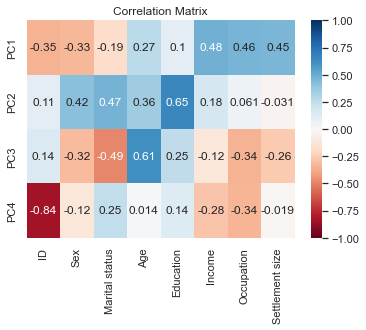

In [ ]:
s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()

## 4.3 Implementing K-Means Clustering considering the 4 PC as features
#### consider also 4 clusters to compare the improvements of using PCA

In [ ]:
pca_scores = pca.transform(customers_scaled)
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=0)

In [ ]:
df_segm_pca = pd.concat([df_customers.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca.columns.values[-4:] = ['PC1', 'PC2', 'PC3', 'PC4']
df_segm_pca['K-means PCA'] = kmeans_pca.labels_

df_segm_pca

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC1,PC2,PC3,PC4,K-means PCA
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,2.036586,1.428485,3
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,-2.433785,1.190092,1
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,1.974083,2.014387,0
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,0.635332,0.836900,2
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,1.127543,1.013575,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-1.485348,0.432286,1.615196,-1.395080,0
1996,100001997,1,1,27,1,117744,1,0,-1.672129,0.839600,-0.923547,-1.417292,1
1997,100001998,0,0,31,0,86400,0,0,-1.841798,-2.158681,1.116012,-1.126136,0
1998,100001999,1,1,24,1,97968,0,0,-2.716832,0.561390,-0.476253,-0.743730,1


## Question:
## How to analyze/compare if the kmeans results (with 4 clusters) were improved by projecting the data into 4 PC?

In [ ]:
# place your code here!

df_segm_pca['K-means PCA'].value_counts()

df_segm_pca['K-means PCA'].value_counts().plot(kind='bar')
plt.title('Segment Counts')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

df_segm_pca.groupby('K-means PCA').mean()

df_segm_pca.groupby('K-means PCA').mean().plot(kind='bar')
plt.title('Segment Means')
plt.xlabel('Segment')
plt.ylabel('Mean')
plt.show()



NameError: name 'df_segm_pca' is not defined

##4.4 Analyze segmentation results

In [ ]:
df_segm_pca.mean()
df_segm_pca.groupby(['K-means PCA'])['ID'].nunique()

df_segm_pca_analysis = df_segm_pca.groupby(['K-means PCA']).mean().round(4)
df_segm_pca_analysis

ID                 1.000010e+08
Sex                4.570000e-01
Marital status     4.965000e-01
Age                3.590900e+01
Education          1.038000e+00
Income             1.209544e+05
Occupation         8.105000e-01
Settlement size    7.390000e-01
PC1               -1.137757e-15
PC2               -5.218048e-17
PC3               -1.256772e-16
PC4               -5.984102e-17
K-means PCA        1.386000e+00
dtype: float64

K-means PCA
0    410
1    680
2    638
3    272
Name: ID, dtype: int64

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC1,PC2,PC3,PC4
K-means PCA,,,,,,,,,,,,
0,1.000014e+08,0.3902,0.0512,34.6390,0.7341,93405.4659,0.2439,0.0463,-1.2623,-0.9262,1.0006,-0.3454
1,1.000011e+08,0.8838,0.9882,28.9647,1.0662,105746.3721,0.6353,0.4265,-1.1940,0.5944,-0.8243,0.1584
2,1.000007e+08,0.0313,0.1818,35.6223,0.7382,140171.5799,1.2461,1.3777,1.4626,-0.9497,-0.1533,-0.0076
3,1.000009e+08,0.4890,0.6765,55.8566,2.1287,155424.9853,1.0809,1.0662,1.4571,2.1377,0.9119,0.1423


(this analysis must be supported by graphs or detailed summarization!!!!)

- **Cluster 0**: mostly non-single women with average age of 33 yo, average income, mostly unemployed, with high education and, generally, from small cities. 
  
- **Cluster 1**: mostly single men with average age of 36 yo, income below the average, unemployed, with no-education/high education and from small cities. 

- **Cluster 2**: non-single men with average age of 33 yo, average income, employee/oficial, with high education and from mid-size cities. 

- **Cluster 3**: single men with average age of 40 yo, income above average, mostly management/self-employed, with no-education/high education and, generally, from mid/big cities. 
 

## 4.4. Visualization of the segments with respect to the first two components

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='PC2', ylabel='PC1'>

Text(0.5, 1.0, 'Component 1 vs Component 2')

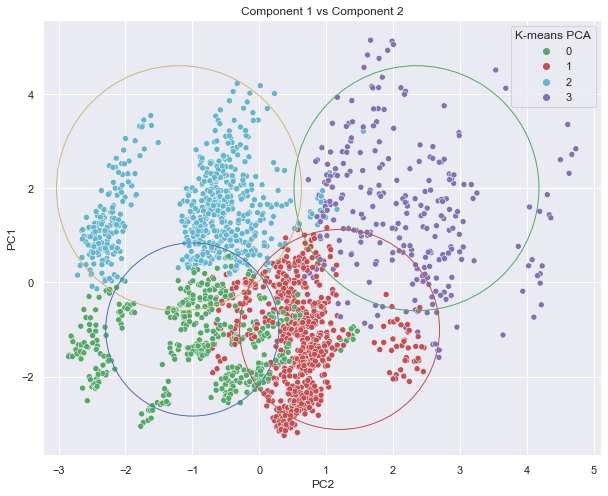

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['PC2'],
    y=df_segm_pca['PC1'],
    hue=df_segm_pca['K-means PCA'],
    palette=['g','r','c','m']
)
plt.scatter(2.35, 2 , s=60000, facecolors='none', edgecolors='g' )
plt.scatter(-1.2, 2 , s=60000, facecolors='none', edgecolors='y' )
plt.scatter(-1, -1 , s=30000, facecolors='none', edgecolors='b' )
plt.scatter(1.2, -1 , s=40000, facecolors='none', edgecolors='r' )

plt.title('Component 1 vs Component 2')
plt.show()